# ML

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

In [44]:
#data = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/traindataset加金門後/00traindata_all.csv ', index_col = 'ID')
data = pd.read_csv('/content/drive/MyDrive/深度學習/traindataset加金門後/cc_reorder.csv', index_col = 'ID')
data = data.drop(['Unnamed: 0'], axis=1)
data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入,單價
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,16,177,2.40,27,2.15,4.20,9126.87,166.10,0.006300,4.627714
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,9,71,6.61,30,3.61,3.53,9126.87,166.10,0.006300,1.887258
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,9,18,5.96,126,7.19,7.82,924.21,161.78,0.004997,1.489072
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,9,52,5.19,72,4.90,4.96,1946.61,147.86,0.005074,2.051217
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,33,167,1.36,73,0.99,1.21,1946.61,147.86,0.005074,3.269198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,6,63,6.39,94,6.23,12.11,1868.59,101.89,0.005368,0.903505
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,6,34,1.38,86,1.77,6.96,4344.33,87.03,0.006842,1.044041
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,12,71,20.86,77,20.51,14.76,1946.61,147.86,0.005074,2.144908


In [4]:
description = data.describe()
means = description.loc['mean']
stds = description.loc['std']
for i in range(0, len(data.columns)):
  print(data.columns[i], means[i], stds[i])


縣市 2.8088673304399627 3.026221800370156
土地面積 0.018416343234275656 1.072279294330518
移轉層次 7.433665219981278 5.089029017773684
總樓層數 12.602672113011659 6.840006694631858
主要用途 4.197515105097438 3.744824143711559
主要建材 3.921027997617224 0.6484491470596978
建物型態 0.5767168751595609 0.7845632874974598
屋齡 21.31905795251468 14.425559839833351
建物面積 0.03051706905723799 1.083601936427255
車位面積 0.021030278023621955 1.030720137907054
車位個數 0.6386690494426006 0.6781570008350248
主建物面積 0.02662287401469924 1.0773742110078735
陽台面積 0.02487608399558077 1.0724524664074586
附屬建物面積 0.023621139916126827 1.177751765018272
經度 121.18318532855402 0.49210994513658546
緯度 24.5777380667816 0.8374206535732178
站點級別 2.2210024678750746 1.0872200188741548
與大眾交通最短距 1.4782410007658922 1.5625029441057765
與國小最短距 0.522059399200068 0.31697852300416635
國小總人數 196.16092247468302 116.39409018250367
與國中最短距 0.6988111650072334 0.44201200445575184
國中總人數 324.6055654837886 198.88975002118846
與高中最短距 1.080371883243979 0.8628026807714508
高中總人數 425

In [ ]:
stats = data.describe().loc[['mean', 'std']]
a=0
normal = []
for col in data.columns:
    mean = stats.loc['mean', col]
    std = stats.loc['std', col]
    if std>2:
      print(a,f": {col}, Mean: {mean:.4f}, Std: {std:.4f}")
      normal.append(col)
    a+=1
print(normal)

0 : 縣市, Mean: 2.8089, Std: 3.0262
2 : 移轉層次, Mean: 7.4337, Std: 5.0890
3 : 總樓層數, Mean: 12.6027, Std: 6.8400
4 : 主要用途, Mean: 4.1975, Std: 3.7448
7 : 屋齡, Mean: 21.3191, Std: 14.4256
19 : 國小總人數, Mean: 196.1609, Std: 116.3941
21 : 國中總人數, Mean: 324.6056, Std: 198.8898
23 : 高中總人數, Mean: 425.8314, Std: 304.9226
25 : 大學總人數, Mean: 8551.7935, Std: 5925.4039
29 : 與腳踏車站最短距, Mean: 1.2737, Std: 11.4610
32 : <0.5的超商數量, Mean: 11.8897, Std: 7.5855
33 : <0.5公車站數, Mean: 77.2611, Std: 61.6043
34 : 與政府最短距, Mean: 5.9395, Std: 4.4671
35 : 縣市_區域, Mean: 64.1907, Std: 34.6451
36 : 與百貨最短距, Mean: 6.0573, Std: 5.7093
37 : 與高鐵最短距, Mean: 7.2106, Std: 7.4873
38 : 人口密度, Mean: 3172.0008, Std: 3069.4068
39 : 老化指數, Mean: 144.1540, Std: 25.5656
['縣市', '移轉層次', '總樓層數', '主要用途', '屋齡', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '與腳踏車站最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '與高鐵最短距', '人口密度', '老化指數']


In [ ]:
#0, 4, 5, 6, 10, 14-19是類別資料以及加權數值
column_names = data.columns
column_indices = range(len(column_names))

for idx, name in zip(column_indices, column_names):
    print(f"{idx}: {name}")

0: 縣市
1: 土地面積
2: 移轉層次
3: 總樓層數
4: 主要用途
5: 主要建材
6: 建物型態
7: 屋齡
8: 建物面積
9: 車位面積
10: 車位個數
11: 主建物面積
12: 陽台面積
13: 附屬建物面積
14: 經度
15: 緯度
16: 站點級別
17: 與大眾交通最短距
18: 與國小最短距
19: 國小總人數
20: 與國中最短距
21: 國中總人數
22: 與高中最短距
23: 高中總人數
24: 與大學最短距
25: 大學總人數
26: 與atm最短距
27: 與post最短距
28: 與bank最短距
29: 與腳踏車站最短距
30: 與醫療機構最短距
31: 與便利超商最短距
32: <0.5的超商數量
33: <0.5公車站數
34: 與政府最短距
35: 縣市_區域
36: 與百貨最短距
37: 與高鐵最短距
38: 人口密度
39: 老化指數
40: 平均收入
41: 單價


#分城市

In [ ]:
def city_traindataset(df, city):
  city_df = df[df['縣市']==city]
  city_df = city_df.reset_index()
  return city_df

In [ ]:
df_num = data
taipei_df = city_traindataset(df_num, 0)#台北市
newtaipei_df = city_traindataset(df_num, 1)#新北市

taichung_df = city_traindataset(df_num, 4)#台中市
kaohsiung_df = city_traindataset(df_num, 6)#高雄市
tainan_df = city_traindataset(df_num, 7)#台南市
taoyuan_df = city_traindataset(df_num, 5)#桃園市
hsinchu_df = city_traindataset(df_num, 3)#新竹縣
hsinchus_df = city_traindataset(df_num, 2)#新竹市

keelong_df = city_traindataset(df_num, 12) #基隆市
miaoli_df = city_traindataset(df_num, 16) #苗栗縣
chunhua_df = city_traindataset(df_num, 8)#彰化縣
yuinlin_df = city_traindataset(df_num, 11)#雲林縣
chiayi_df = city_traindataset(df_num, 15) #嘉義縣
chiayis_df = city_traindataset(df_num, 10)#嘉義市
pingtung_df = city_traindataset(df_num, 14)#屏東縣
hualien_df = city_traindataset(df_num, 13)#花蓮縣
yilan_df = city_traindataset(df_num, 9)#宜蘭縣
kimen_df = city_traindataset(df_num, 17)#金門縣

north_df = pd.concat([taipei_df,newtaipei_df]).sort_index()
mid_df = pd.concat([keelong_df, taoyuan_df, hsinchu_df, hsinchus_df, miaoli_df,taichung_df, chunhua_df, yuinlin_df]).sort_index()
south_df = pd.concat([chiayi_df,chiayis_df, tainan_df, kaohsiung_df, pingtung_df]).sort_index()
other_df = pd.concat([hualien_df,yilan_df, kimen_df]).sort_index()
o = pd.concat([north_df,mid_df,south_df,other_df]).sort_index()
#north_df = pd.concat([taipei_df,newtaipei_df]).sort_index()

def df_process(north_df):
  north_df = north_df.reset_index()
  north_df = north_df.drop(['index'], axis=1)
  north_df = north_df.set_index('ID')
  return north_df
df_1 = df_process(o)
df_1

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入,單價
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,16,177,2.40,27,2.15,4.20,9126.87,166.10,0.006300,4.627714
TR-97,14,0.529830,2,14,11,4,0,4.250000,-0.240800,-0.819326,...,4,0,1.13,61,1.81,17.24,287.76,193.08,0.004096,1.090886
TR-37,7,0.530383,6,7,11,4,2,4.916667,-0.764779,-0.153516,...,6,29,14.85,38,12.31,17.42,845.48,156.53,0.004564,1.465649
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,9,18,5.96,126,7.19,7.82,924.21,161.78,0.004997,1.489072
TR-509,10,-0.866760,10,12,2,4,0,28.916667,-0.204604,-0.819326,...,4,0,3.03,43,4.61,12.11,4380.20,139.69,0.005458,0.889451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11741,1,-0.783027,4,12,2,4,0,23.500000,0.276859,0.360904,...,23,95,5.03,76,4.80,4.40,1946.61,147.86,0.005074,2.379135
TR-11746,1,1.390665,3,25,11,5,0,1.166667,2.090101,3.220335,...,17,53,4.21,72,3.93,3.98,1946.61,147.86,0.005074,2.613362
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,12,71,20.86,77,20.51,14.76,1946.61,147.86,0.005074,2.144908


#標準化

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
'''
feature_continuous = [
    '移轉層次',
    # '總樓層數',
    '屋齡',
    '與大眾交通最短距',
    '與國小最短距',
    # '國小總人數',
    '與國中最短距',
    # '國中總人數',
    '與高中最短距',
    # '高中總人數',
    '與大學最短距',
    # '大學總人數',
    '與atm最短距',
    '與post最短距',
    '與bank最短距',
    '與腳踏車站最短距',
    '與醫療機構最短距',
    '與便利超商最短距',
    '<0.5的超商數量',
    '<0.5公車站數',
    '與政府最短距',
    '與百貨最短距',
    '<0.3公車站數',
    '人口密度',
    '老化指數',
    '與高鐵最短距',
    '縱坐標',
    '橫坐標',
    '平均收入'
]
'''

feature_continuous = ['移轉層次','總樓層數','屋齡', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '與腳踏車站最短距', '<0.5公車站數', '縣市_區域', '人口密度', '老化指數']#目前最好

df = data
x = df[feature_continuous].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x)
df[feature_continuous] = x_standardized

df


,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入,單價
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,0.700819,-0.234319,2,4,0,0.780889,-0.174154,-0.819326,...,16,1.619094,2.40,-1.073521,2.15,4.20,1.940154,0.858456,0.006300,4.627714
TR-2,0,0.100134,-0.085219,-0.088114,2,4,0,0.197409,0.314204,-0.819326,...,9,-0.101638,6.61,-0.986926,3.61,3.53,1.940154,0.858456,0.006300,1.887258
TR-3,6,0.181921,0.504309,0.350501,11,0,0,-1.050430,0.423366,0.161624,...,9,-0.962004,5.96,1.784145,7.19,7.82,-0.732352,0.689472,0.004997,1.489072
TR-4,1,0.085594,0.307800,0.204296,11,4,0,-0.865565,0.164249,0.524653,...,9,-0.410071,5.19,0.225418,4.90,4.96,-0.399244,0.144967,0.005074,2.051217
TR-5,1,-0.938116,6.596104,4.444239,2,5,0,-0.715362,0.985839,0.532377,...,33,1.456760,1.36,0.254283,0.99,1.21,-0.399244,0.144967,0.005074,3.269198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,-0.674748,-1.111548,2,4,1,0.486260,-0.271825,0.484488,...,6,-0.231505,6.39,0.860455,6.23,12.11,-0.424664,-1.653228,0.005368,0.903505
TR-11748,2,-0.225809,-1.067767,-0.819138,2,4,2,0.549807,-0.325832,-0.819326,...,6,-0.702271,1.38,0.629532,1.77,6.96,0.381956,-2.234502,0.006842,1.044041
TR-11749,1,-0.943908,1.486857,0.642911,2,4,0,0.104976,-0.848662,-0.819326,...,12,-0.101638,20.86,0.369744,20.51,14.76,-0.399244,0.144967,0.005074,2.144908


In [ ]:
df.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '與高鐵最短距', '人口密度', '老化指數', '平均收入', '單價', '學區人數'],
      dtype='object')

In [ ]:
#df = df[['縣市', '經度', '緯度', '站點級別', '與大眾交通最短距', '與國小最短距', '與國中最短距', '與高中最短距', '與大學最短距', '與post最短距', '與bank最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '人口密度', '老化指數', '與高鐵最短距', '平均收入']
]
'''
縣市           0.580683
經度           0.456070
緯度           0.394313
站點級別         0.276209
與大眾交通最短距     0.322400
與國小最短距       0.206658
與國中最短距       0.200208
與高中最短距       0.287924
高中總人數        0.101608
與大學最短距       0.204057
與atm最短距      0.143283
與post最短距     0.230625
與bank最短距     0.274789
與醫療機構最短距     0.165900
與便利超商最短距     0.122501
<0.5的超商數量    0.468489
<0.5公車站數     0.485722
與政府最短距       0.186859
縣市_區域        0.443979
與百貨最短距       0.284007
人口密度         0.713742
老化指數         0.302304
與高鐵最短距       0.314430
平均收入         0.575674
'''

In [ ]:
#df = df.drop(['單價', '主要用途', '主要建材', '建物型態'], axis = 1)
#df_num_encoded = pd.get_dummies(df, columns=['主要用途', '主要建材', '建物型態'], dtype=np.int8)
#df_num_encoded

In [46]:
#df = df.drop(['縣市_區域', '移轉層次', '總樓層數', '主要用途', '主要建材', '屋齡','建物面積', '建物型態','車位個數' ,'陽台面積','國小總人數', '國中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
'''
df = df.drop(['縣市', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位個數', '陽台面積', '單價', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '與政府最短距', '縣市_區域',
       '與百貨最短距', '<0.3公車站數', '與高鐵最短距', '縱坐標', '橫坐標'], axis=1)
       '''
df = df.drop(['縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數'], axis=1)#目前最好
#df = df.drop(['主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數'], axis=1)#目前第二好
#df = df.drop(['單價', '陽台面積', '站點級別', '與大學最短距','與醫療機構最短距','與便利超商最短距', '與政府最短距','與腳踏車站最短距', '與post最短距', '主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
#df = df.drop(['單價', '縣市_區域', '移轉層次', '總樓層數', '屋齡','建物面積','車位個數' ,'陽台面積','國小總人數', '國中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
#df = df.drop(['單價', '主要用途', '主要建材', '國小總人數', '與國中最短距','國中總人數','高中總人數' ,'與大學最短距','大學總人數', '<0.5公車站數', '與政府最短距', '縣市_區域', '人口密度'], axis=1)

df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入,單價
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,0.700819,-0.234319,2,4,0,0.780889,-0.174154,-0.819326,...,0.14,16,1.619094,2.40,2.15,4.20,1.940154,0.858456,0.006300,4.627714
TR-2,0,0.100134,-0.085219,-0.088114,2,4,0,0.197409,0.314204,-0.819326,...,0.22,9,-0.101638,6.61,3.61,3.53,1.940154,0.858456,0.006300,1.887258
TR-3,6,0.181921,0.504309,0.350501,11,0,0,-1.050430,0.423366,0.161624,...,0.12,9,-0.962004,5.96,7.19,7.82,-0.732352,0.689472,0.004997,1.489072
TR-4,1,0.085594,0.307800,0.204296,11,4,0,-0.865565,0.164249,0.524653,...,0.19,9,-0.410071,5.19,4.90,4.96,-0.399244,0.144967,0.005074,2.051217
TR-5,1,-0.938116,6.596104,4.444239,2,5,0,-0.715362,0.985839,0.532377,...,0.06,33,1.456760,1.36,0.99,1.21,-0.399244,0.144967,0.005074,3.269198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,-0.674748,-1.111548,2,4,1,0.486260,-0.271825,0.484488,...,0.12,6,-0.231505,6.39,6.23,12.11,-0.424664,-1.653228,0.005368,0.903505
TR-11748,2,-0.225809,-1.067767,-0.819138,2,4,2,0.549807,-0.325832,-0.819326,...,0.12,6,-0.702271,1.38,1.77,6.96,0.381956,-2.234502,0.006842,1.044041
TR-11749,1,-0.943908,1.486857,0.642911,2,4,0,0.104976,-0.848662,-0.819326,...,0.05,12,-0.101638,20.86,20.51,14.76,-0.399244,0.144967,0.005074,2.144908


In [ ]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = data

#非類別欄位
#corr刪掉了'移轉層次', '主建物面積', '陽台面積', '車位個數', '經度'
columns_to_standardize = ['土地面積', '建物面積', '車位面積', '附屬建物面積']
columns_to_minmax = ['總樓層數', '屋齡', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']

#未用corr()刪掉
#columns_to_standardize = ['土地面積', '建物型態', '建物面積', '車位面積', '主建物面積', '陽台面積', '附屬建物面積']
#columns_to_minmax = ['移轉層次', '總樓層數', '屋齡', '車位個數','經度', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']

#baseline 刪除corr高的、variance低的
#columns_to_standardize = ['土地面積', '總樓層數', '屋齡', '建物面積', '車位面積', '附屬建物面積']

x1 = df[columns_to_standardize].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x1)
df[columns_to_standardize] = x_standardized

x2 = df[columns_to_minmax].values
mm = MinMaxScaler()
x_minmax = mm.fit_transform(x2)
df[columns_to_minmax] = x_minmax

print(df)
'''

"\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler\n\ndf = data\n\n#非類別欄位\n#corr刪掉了'移轉層次', '主建物面積', '陽台面積', '車位個數', '經度'\ncolumns_to_standardize = ['土地面積', '建物面積', '車位面積', '附屬建物面積']\ncolumns_to_minmax = ['總樓層數', '屋齡', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']\n\n#未用corr()刪掉\n#columns_to_standardize = ['土地面積', '建物型態', '建物面積', '車位面積', '主建物面積', '陽台面積', '附屬建物面積']\n#columns_to_minmax = ['移轉層次', '總樓層數', '屋齡', '車位個數','經度', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']\n\n#baseline 刪除corr高的、variance低的\n#columns_to_standardize = ['土地面積', '總樓層數', '屋齡', '建物面積', '車位面積', '附屬建物面積']\n\nx1 = df[columns_to_standardize].values\nss = StandardScaler()\nx_standardized = ss.fit_transform(x1)\ndf[columns_to_standardize] = x_standardized\n\nx2 = df[columns_to_minmax].values\nmm = MinMaxScaler()\nx_minmax = mm.fit_transform(x2)\ndf[columns_to_minmax] = x_minmax\n\nprint(df)\n"

In [47]:
a = df.drop(['單價'], axis = 1)
x = np.array(a)
print(x.shape)
print(x)

(11751, 36)
[[ 0.00000000e+00 -2.56715997e-01  7.00818668e-01 ...  1.94015423e+00
   8.58455720e-01  6.29970700e-03]
 [ 0.00000000e+00  1.00134332e-01 -8.52193359e-02 ...  1.94015423e+00
   8.58455720e-01  6.29970700e-03]
 [ 6.00000000e+00  1.81920543e-01  5.04309167e-01 ... -7.32352089e-01
   6.89471561e-01  4.99725200e-03]
 ...
 [ 1.00000000e+00 -9.43907635e-01  1.48685667e+00 ... -3.99244237e-01
   1.44967049e-01  5.07370700e-03]
 [ 1.00000000e+00 -1.14711140e+00  8.97328169e-01 ... -3.99244237e-01
   1.44967049e-01  5.07370700e-03]
 [ 1.00000000e+00 -3.98153509e-01  7.00818668e-01 ... -3.99244237e-01
   1.44967049e-01  5.07370700e-03]]


In [ ]:
'''
df = data
#x = df[['人口密度', '橫坐標', '縱坐標', '站點級別', '與大眾交通最短距', '與國小最短距', '與國中最短距', '與高中最短距', '與大學最短距', '與post最短距', '與bank最短距', '<0.5的超商數量', '<0.3公車站數', '縣市_區域', '老化指數', '與高鐵最短距']]
#x = df[['橫坐標', '縱坐標', '人口密度', '<0.5的超商數量', '<0.3公車站數', '老化指數']]
#x = df[['縣市', '經度', '緯度', '<0.5的超商數量', '<0.5公車站數', '縣市_區域', '<0.3公車站數', '人口密度', '縱坐標', '橫坐標']]
#x = df[['縣市', '經度', '緯度', '高中總人數', '大學總人數', '縣市_區域', '人口密度', '老化指數', '縱坐標', '橫坐標']]
#x = df[['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '主建物面積', '陽台面積', '經度', '緯度', '站點級別', '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數', '與大學最短距', '與atm最短距', '與post最短距', '與bank最短距', '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '<0.3公車站數', '人口密度', '老化指數', '與高鐵最短距', '縱坐標', '橫坐標']]
#x = df[['縣市', '建物面積', '車位面積', '車位個數', '主建物面積', '經度', '與國小最短距', '與高中最短距', '與bank最短距', '與便利超商最短距']]
#x = df[['縣市', '屋齡', '與政府最短距', '人口密度']]
#x = df[['縣市', '移轉層次', '總樓層數', '屋齡', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '與腳踏車站最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '<0.3公車站數', '人口密度', '與高鐵最短距', '縱坐標', '橫坐標']]
x = df[['高中總人數', '縣市_區域', '大學總人數', '國中總人數', '經度', '國小總人數', '縣市', '人口密度', '老化指數' , '緯度']]
x = np.array(x)
print(x.shape)
print(x)
'''

"\ndf = data\n#x = df[['人口密度', '橫坐標', '縱坐標', '站點級別', '與大眾交通最短距', '與國小最短距', '與國中最短距', '與高中最短距', '與大學最短距', '與post最短距', '與bank最短距', '<0.5的超商數量', '<0.3公車站數', '縣市_區域', '老化指數', '與高鐵最短距']]\n#x = df[['橫坐標', '縱坐標', '人口密度', '<0.5的超商數量', '<0.3公車站數', '老化指數']]\n#x = df[['縣市', '經度', '緯度', '<0.5的超商數量', '<0.5公車站數', '縣市_區域', '<0.3公車站數', '人口密度', '縱坐標', '橫坐標']]\n#x = df[['縣市', '經度', '緯度', '高中總人數', '大學總人數', '縣市_區域', '人口密度', '老化指數', '縱坐標', '橫坐標']]\n#x = df[['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '主建物面積', '陽台面積', '經度', '緯度', '站點級別', '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數', '與大學最短距', '與atm最短距', '與post最短距', '與bank最短距', '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '<0.3公車站數', '人口密度', '老化指數', '與高鐵最短距', '縱坐標', '橫坐標']]\n#x = df[['縣市', '建物面積', '車位面積', '車位個數', '主建物面積', '經度', '與國小最短距', '與高中最短距', '與bank最短距', '與便利超商最短距']]\n#x = df[['縣市', '屋齡', '與政府最短距', '人口密度']]\n#x = df[['縣市', '移轉層次', '總樓層數', '屋齡', '國小總人數', '國中總人

In [ ]:
'''
df = data

x = df.drop(['縣市','單價','經度','緯度','<0.3公車站數','主要用途','主要建材','站點級別','國小總人數','國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)
#x = df.drop(['主要用途','主要建材','站點級別','國小總人數','國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)

#x = df.drop(['單價','主要用途','主要建材','建物型態','縣市'], axis=1)
#x = df.drop(['單價','土地面積','移轉層次','總樓層數','建物面積','車位個數','陽台面積','附屬建物面積','主要用途','主要建材','建物型態'], axis=1)
x = np.array(x)
print(x.shape)
print(x)
'''


"\ndf = data\n\nx = df.drop(['縣市','單價','經度','緯度','<0.3公車站數','主要用途','主要建材','站點級別','國小總人數','國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)\n#x = df.drop(['主要用途','主要建材','站點級別','國小總人數','國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)\n\n#x = df.drop(['單價','主要用途','主要建材','建物型態','縣市'], axis=1)\n#x = df.drop(['單價','土地面積','移轉層次','總樓層數','建物面積','車位個數','陽台面積','附屬建物面積','主要用途','主要建材','建物型態'], axis=1)\nx = np.array(x)\nprint(x.shape)\nprint(x)\n"

In [48]:
x.shape

(11751, 36)

In [49]:
y = df['單價']
y

ID
TR-1        4.627714
TR-2        1.887258
TR-3        1.489072
TR-4        2.051217
TR-5        3.269198
              ...   
TR-11747    0.903505
TR-11748    1.044041
TR-11749    2.144908
TR-11750    2.285444
TR-11751    2.660207
Name: 單價, Length: 11751, dtype: float64

In [50]:
y.shape

(11751,)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100, shuffle=True)

In [52]:
print(' x_num:',x_train.shape, x_test.shape, '\n',
      'y_price:',y_train.shape, y_test.shape)

 x_num: (10575, 36) (1176, 36) 
 y_price: (10575,) (1176,)


In [42]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
!pip install xgboost

In [ ]:
name = 'DecisionTreeRegressor'
model_DecisionTreeRegressor = DecisionTreeRegressor(random_state=42)


model_DecisionTreeRegressor.fit(x_train, y_train)
pred_result = model_DecisionTreeRegressor.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)
print("\n")

DecisionTreeRegressor
MAPE: 13.454625610164763
R-squared: 0.8479670042299036




In [ ]:
name = 'GradientBoostingRegressor'
model_GradientBoostingRegressor =GradientBoostingRegressor(n_estimators=700)

model_GradientBoostingRegressor.fit(x_train, y_train)
pred_result = model_GradientBoostingRegressor.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)
print("\n")

GradientBoostingRegressor
MAPE: 11.161056039226379
R-squared: 0.9165508582309418




In [ ]:
name ='XGBRegressor'
#model_XGBRegressor = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
#model_XGBRegressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=1000, max_depth=1000, min_child_weight=5, seed=42,subsample=0.7, colsample_bytree=0.7, gamma=0.0001, reg_alpha=1, reg_lambda=1)
#model_XGBRegressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=70, max_depth=40, min_child_weight=10, seed=42, subsample=0.8, colsample_bytree=0.7, gamma=0.0001, reg_alpha=0, reg_lambda=0)
#model_XGBRegressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=1000, max_depth=1000, min_child_weight=5, seed=42,
                             #subsample=0.7, colsample_bytree=0.7, gamma=0.001, reg_alpha=1, reg_lambda=1)
model_XGBRegressor = xgb.XGBRegressor(learning_rate=0.1, n_estimators=100)
model_XGBRegressor.fit(x_train, y_train)
pred_result = model_XGBRegressor.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)
print("\n")

XGBRegressor
MAPE: 10.43031022799837
R-squared: 0.9223964879137034




In [ ]:
name ='RegRandomForestRegressor_100ressor'
model_RandomForestRegressor_100 = RandomForestRegressor(n_estimators=100, random_state=42)

model_RandomForestRegressor_100.fit(x_train, y_train)
pred_result = model_RandomForestRegressor_100.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)
print("\n")

RegRandomForestRegressor_100ressor
MAPE: 9.868915484650834
R-squared: 0.9239512861543628




In [53]:
name ='BaggingRegressor'
model_BaggingRegressor = BaggingRegressor(DecisionTreeRegressor(), n_estimators=249, random_state=0)

model_BaggingRegressor.fit(x_train, y_train)
pred_result = model_BaggingRegressor.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)
print("\n")

BaggingRegressor
MAPE: 9.72190932376277
R-squared: 0.9259606883053085




In [ ]:
name ='BaggingRegressor'
model_BaggingRegressor = BaggingRegressor(DecisionTreeRegressor(), n_estimators=249, random_state=0)
model_BaggingRegressor.fit(x, y)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=249,
                 random_state=0)

In [ ]:
from sklearn.ensemble import StackingRegressor

name = '集成學習'

'''
estimators = [
    ('XGBRegressor', xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=40, min_child_weight=5, seed=42,
                             subsample=0.7, colsample_bytree=0.7, gamma=0.0001, reg_alpha=1, reg_lambda=1)),
    ('BaggingRegressor', BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, random_state=0)),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100, random_state=42))
]
'''

estimators = [
    ('XGBRegressor', xgb.XGBRegressor(learning_rate=0.1, n_estimators=70, max_depth=40, min_child_weight=10, seed=42,
                             subsample=0.7, colsample_bytree=0.7, gamma=0.001, reg_alpha=1, reg_lambda=1)),
    ('BaggingRegressor', BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, random_state=0)),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100, random_state=42))
]


stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=BaggingRegressor())
stacking_regressor.fit(x_train, y_train)
stacking_predictions = stacking_regressor.predict(x_test)

print(name)
print("Stacking MSE:", mape(y_test, stacking_predictions))
print("R-squared:", r2_score(y_test, stacking_predictions))


集成學習
Stacking MSE: 10.782105898669874
R-squared: 0.9115055346231872


# 其他模型

In [ ]:
models = [('xgb.XGBRegressor',xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)),
          ('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5)),
          ('BayesianRidge', BayesianRidge()),
          ('TweedieRegressor', TweedieRegressor(power=1, alpha=0.5)),
          ('CatBoostRegressor', CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1)),
          ('KernelRidge', KernelRidge(alpha=0.1, kernel='polynomial', degree=2))]

for name, model in models:
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print(name)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)
  print("-----------------------------------")

xgb.XGBRegressor
MAPE: 9.796798858735968
R-squared: 0.9292357271497353
-----------------------------------
ElasticNet
MAPE: 22.777329954156066
R-squared: 0.6576843790215494
-----------------------------------
BayesianRidge
MAPE: 22.037737740110988
R-squared: 0.6790195650004565
-----------------------------------
TweedieRegressor
MAPE: 43.12739975508905
R-squared: -7.714237984290939e-05
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:289: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


0:	learn: 0.9343797	total: 3.98ms	remaining: 394ms
1:	learn: 0.8712359	total: 7.69ms	remaining: 377ms
2:	learn: 0.8158753	total: 12.2ms	remaining: 393ms
3:	learn: 0.7666118	total: 15.8ms	remaining: 380ms
4:	learn: 0.7206530	total: 19.8ms	remaining: 375ms
5:	learn: 0.6843996	total: 23.5ms	remaining: 369ms
6:	learn: 0.6521848	total: 32.7ms	remaining: 434ms
7:	learn: 0.6232690	total: 38.5ms	remaining: 443ms
8:	learn: 0.5964152	total: 42.2ms	remaining: 427ms
9:	learn: 0.5732154	total: 45.6ms	remaining: 411ms
10:	learn: 0.5523516	total: 49.2ms	remaining: 398ms
11:	learn: 0.5335365	total: 52.8ms	remaining: 387ms
12:	learn: 0.5166079	total: 56.5ms	remaining: 378ms
13:	learn: 0.5002370	total: 62.8ms	remaining: 386ms
14:	learn: 0.4838557	total: 66.4ms	remaining: 376ms
15:	learn: 0.4705157	total: 70.1ms	remaining: 368ms
16:	learn: 0.4583309	total: 73.6ms	remaining: 360ms
17:	learn: 0.4487683	total: 77.4ms	remaining: 353ms
18:	learn: 0.4401358	total: 81.1ms	remaining: 346ms
19:	learn: 0.4317759	t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVR,SVR

In [ ]:
models = [('LinearRegression',LinearRegression()),
          ('Ridge',Ridge(alpha=100)),
          ('Lasso',Lasso(alpha=0.00000001)),
          ('LinearSVR',LinearSVR(random_state=42)),
          ('SVR',SVR())]

for name, model in models:
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print(name)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)
  print("-----------------------------------")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
models = [('RandomForestRegressor_100',RandomForestRegressor(n_estimators=100, random_state=42))]

for name, model in models:
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print(name)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)

In [ ]:
models = [('KNeighborsRegressor_5',KNeighborsRegressor(n_neighbors=5)),
          ('KNeighborsRegressor_50',KNeighborsRegressor(n_neighbors=50))]

for name, model in models:
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print(name)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)
  print("-----------------------------------")

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
models = [('MLPRegressor',MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)),
          ('AdaBoostRegressor',AdaBoostRegressor(n_estimators=50, random_state=0)),
          ('KNeighborsRegressor',KNeighborsRegressor(n_neighbors=5)),
          ('BaggingRegressor',BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, random_state=0))]

for name, model in models:
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print(name)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)
  print("-----------------------------------")

In [ ]:
!pip install tensorflow_decision_forests

In [ ]:
import tensorflow_decision_forests as tfdf

In [ ]:
models = [('tfdf_keras_RandomForestModel',tfdf.keras.RandomForestModel(task=tfdf.keras.Task.REGRESSION)),
          ('tfdf_keras_GradientBoostedTreesModel',tfdf.keras.GradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION)),
          ('tfdf_keras_CartModel',tfdf.keras.CartModel(task=tfdf.keras.Task.REGRESSION)),
          ('tfdf_keras_DistributedGradientBoostedTreesModel',tfdf.keras.DistributedGradientBoostedTreesModel(task=tfdf.keras.Task.REGRESSION))]

for name, model in models:
  model.compile(metrics=["mse"])
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print(name)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)
  print("-----------------------------------")

#預測public test data

In [ ]:
import pandas as pd
public_df = pd.read_csv('/content/drive/MyDrive/深度學習/cc_public+private.csv', index_col='ID')
public_df['ID_numeric'] = public_df.index.str.split('-').str[1].astype(int) #取出id的數字 要排序
public_df = public_df.sort_values(by='ID_numeric')
public_df = public_df.drop(['ID_numeric', 'Unnamed: 0'], axis = 1 )
public_df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
PU-1,1,2.039378,3,7,2,4,2,13.916667,0.472202,0.146176,...,0.14,6.0,139.0,10.72,69,11.12,10.78,1946.61,147.86,0.005074
PR-1,6,-0.541033,12,14,2,4,0,27.916667,0.043596,-0.819326,...,0.17,6.0,12.0,3.35,102,8.93,10.85,924.21,161.78,0.004997
PU-2,1,-0.077786,5,5,2,4,1,40.833333,-0.546455,-0.819326,...,0.14,23.0,54.0,6.58,60,6.22,4.11,1946.61,147.86,0.005074
PR-2,0,0.753799,4,7,4,4,2,0.750000,-0.200582,0.311470,...,0.08,12.0,132.0,13.05,23,10.22,10.33,9126.87,166.10,0.006300
PU-3,1,-0.555766,2,20,10,4,0,1.333333,0.124032,-0.167419,...,0.23,23.0,28.0,1.92,67,1.62,1.71,1946.61,147.86,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PR-5874,6,-0.089851,2,15,10,4,0,4.166667,0.453817,-0.819326,...,0.28,4.0,14.0,6.68,113,7.83,8.34,924.21,161.78,0.004997
PU-5874,1,-0.662691,10,12,2,4,0,12.583333,-0.459699,0.004054,...,0.07,13.0,129.0,7.50,65,7.58,7.74,1946.61,147.86,0.005074
PR-5875,3,1.475407,10,14,2,4,0,7.916667,1.581061,1.748137,...,0.16,10.0,9.0,1.79,80,5.86,2.49,406.65,86.71,0.006555


#分城市

In [ ]:
def city_traindataset(df, city):
  city_df = df[df['縣市']==city]
  city_df = city_df.reset_index()
  return city_df

In [ ]:
df_num = public_df
taipei_df = city_traindataset(df_num, 0)#台北市
newtaipei_df = city_traindataset(df_num, 1)#新北市
'''
taichung_df = city_traindataset(df_num, 4)#台中市
kaohsiung_df = city_traindataset(df_num, 6)#高雄市
tainan_df = city_traindataset(df_num, 7)#台南市
taoyuan_df = city_traindataset(df_num, 5)#桃園市
hsinchu_df = city_traindataset(df_num, 3)#新竹縣
hsinchus_df = city_traindataset(df_num, 2)#新竹市

keelong_df = city_traindataset(df_num, 12) #基隆市
miaoli_df = city_traindataset(df_num, 16) #苗栗縣
chunhua_df = city_traindataset(df_num, 8)#彰化縣
yuinlin_df = city_traindataset(df_num, 11)#雲林縣
chiayi_df = city_traindataset(df_num, 15) #嘉義縣
chiayis_df = city_traindataset(df_num, 10)#嘉義市
pingtung_df = city_traindataset(df_num, 14)#屏東縣
hualien_df = city_traindataset(df_num, 13)#花蓮縣
yilan_df = city_traindataset(df_num, 9)#宜蘭縣
kimen_df = city_traindataset(df_num, 17)#金門縣
'''
north_df = pd.concat([taipei_df,newtaipei_df]).sort_index()
#mid_df = pd.concat([keelong_df, taoyuan_df, hsinchu_df, hsinchus_df, miaoli_df,taichung_df, chunhua_df, yuinlin_df]).sort_index()
#south_df = pd.concat([chiayi_df,chiayis_df, tainan_df, kaohsiung_df, pingtung_df]).sort_index()
#other_df = pd.concat([hualien_df,yilan_df, kimen_df]).sort_index()
#o = pd.concat([mid_df,south_df,other_df]).sort_index()


def df_process(north_df):
  north_df = north_df.reset_index()
  north_df = north_df.drop(['index'], axis=1)
  north_df = north_df.set_index('ID')
  return north_df
df_1 = df_process(north_df)
df_1

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
PR-2,0,0.753799,4,7,4,4,2,0.750000,-0.200582,0.311470,...,0.08,12.0,132.0,13.05,23,10.22,10.33,9126.87,166.10,0.006300
PU-1,1,2.039378,3,7,2,4,2,13.916667,0.472202,0.146176,...,0.14,6.0,139.0,10.72,69,11.12,10.78,1946.61,147.86,0.005074
PU-2,1,-0.077786,5,5,2,4,1,40.833333,-0.546455,-0.819326,...,0.14,23.0,54.0,6.58,60,6.22,4.11,1946.61,147.86,0.005074
PR-3,0,0.482869,6,7,2,4,2,43.916667,0.211936,-0.819326,...,0.04,17.0,144.0,5.89,26,2.09,2.19,9126.87,166.10,0.006300
PU-5,0,-0.610923,3,7,2,4,2,40.500000,-0.863600,-0.819326,...,0.07,24.0,152.0,1.15,20,0.89,3.52,9126.87,166.10,0.006300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PU-5870,1,-0.410747,2,15,0,4,0,8.166667,0.153908,-0.085544,...,0.05,8.0,81.0,8.85,62,8.61,8.45,1946.61,147.86,0.005074
PU-5871,1,-0.300313,4,8,2,4,2,18.250000,-0.471190,0.430420,...,0.04,14.0,250.0,5.94,72,5.84,5.70,1946.61,147.86,0.005074
PR-5873,1,-0.053200,14,14,2,4,0,27.083333,-0.166110,-0.819326,...,0.04,14.0,233.0,11.74,66,11.80,11.52,1946.61,147.86,0.005074


#標準化

In [ ]:
#沒有單價
column_names = public_df.columns
column_indices = range(len(column_names))

for idx, name in zip(column_indices, column_names):
    print(f"{idx}: {name}")

0: 縣市
1: 土地面積
2: 移轉層次
3: 總樓層數
4: 主要用途
5: 主要建材
6: 建物型態
7: 屋齡
8: 建物面積
9: 車位面積
10: 車位個數
11: 主建物面積
12: 陽台面積
13: 附屬建物面積
14: 經度
15: 緯度
16: 站點級別
17: 與大眾交通最短距
18: 與國小最短距
19: 國小總人數
20: 與國中最短距
21: 國中總人數
22: 與高中最短距
23: 高中總人數
24: 與大學最短距
25: 大學總人數
26: 與atm最短距
27: 與post最短距
28: 與bank最短距
29: 與腳踏車站最短距
30: 與醫療機構最短距
31: 與便利超商最短距
32: <0.5的超商數量
33: <0.5公車站數
34: 與政府最短距
35: 縣市_區域
36: 與百貨最短距
37: 與高鐵最短距
38: 人口密度
39: 老化指數
40: 平均收入


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

'''
feature_continuous = [
    '移轉層次',
    # '總樓層數',
    '屋齡',
    '與大眾交通最短距',
    '與國小最短距',
    # '國小總人數',
    '與國中最短距',
    # '國中總人數',
    '與高中最短距',
    # '高中總人數',
    '與大學最短距',
    # '大學總人數',
    '與atm最短距',
    '與post最短距',
    '與bank最短距',
    '與腳踏車站最短距',
    '與醫療機構最短距',
    '與便利超商最短距',
    '<0.5的超商數量',
    '<0.5公車站數',
    '與政府最短距',
    '與百貨最短距',
    '<0.3公車站數',
    '人口密度',
    '老化指數',
    '與高鐵最短距',
    '縱坐標',
    '橫坐標',
    '平均收入'
]
'''

feature_continuous = ['移轉層次','總樓層數','屋齡', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '與腳踏車站最短距', '<0.5公車站數', '縣市_區域', '人口密度', '老化指數']

x = public_df[feature_continuous].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x)
public_df[feature_continuous] = x_standardized

public_df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
PU-1,1,2.039378,-0.872169,-0.825586,2,4,2,-0.511262,0.472202,0.146176,...,0.14,6.0,0.994442,10.72,0.341226,11.12,10.78,-0.412309,0.153106,0.005074
PR-1,6,-0.541033,0.965788,0.251397,2,4,0,0.459228,0.043596,-0.819326,...,0.17,6.0,-1.077376,3.35,1.398810,8.93,10.85,-0.742617,0.699585,0.004997
PU-2,1,-0.077786,-0.463734,-1.133295,2,4,1,1.354621,-0.546455,-0.819326,...,0.14,23.0,-0.392208,6.58,0.052794,6.22,4.11,-0.412309,0.153106,0.005074
PR-2,0,0.753799,-0.667951,-0.825586,4,4,2,-1.423985,-0.200582,0.311470,...,0.08,12.0,0.880247,13.05,-1.132981,10.22,10.33,1.907428,0.869181,0.006300
PU-3,1,-0.555766,-1.076386,1.174525,10,4,0,-1.383548,0.124032,-0.167419,...,0.23,23.0,-0.816359,1.92,0.277130,1.62,1.71,-0.412309,0.153106,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PR-5874,6,-0.089851,-1.076386,0.405251,10,4,0,-1.187139,0.453817,-0.819326,...,0.28,4.0,-1.044749,6.68,1.751337,7.83,8.34,-0.742617,0.699585,0.004997
PU-5874,1,-0.662691,0.557353,-0.056313,2,4,0,-0.603689,-0.459699,0.004054,...,0.07,13.0,0.831307,7.50,0.213034,7.58,7.74,-0.412309,0.153106,0.005074
PR-5875,3,1.475407,0.557353,0.251397,2,4,0,-0.927186,1.581061,1.748137,...,0.16,10.0,-1.126316,1.79,0.693754,5.86,2.49,-0.909826,-2.247553,0.006555


In [ ]:
#沒有單價
column_names = public_df.columns
column_indices = range(len(column_names))

for idx, name in zip(column_indices, column_names):
    print(f"{idx}: {name}")

0: 縣市
1: 土地面積
2: 移轉層次
3: 總樓層數
4: 主要用途
5: 主要建材
6: 建物型態
7: 屋齡
8: 建物面積
9: 車位面積
10: 車位個數
11: 主建物面積
12: 陽台面積
13: 附屬建物面積
14: 經度
15: 緯度
16: 站點級別
17: 與大眾交通最短距
18: 與國小最短距
19: 國小總人數
20: 與國中最短距
21: 國中總人數
22: 與高中最短距
23: 高中總人數
24: 與大學最短距
25: 大學總人數
26: 與atm最短距
27: 與post最短距
28: 與bank最短距
29: 與腳踏車站最短距
30: 與醫療機構最短距
31: 與便利超商最短距
32: <0.5的超商數量
33: <0.5公車站數
34: 與政府最短距
35: 縣市_區域
36: 與百貨最短距
37: 與高鐵最短距
38: 人口密度
39: 老化指數
40: 平均收入


In [ ]:
#df = df.drop(['縣市_區域', '移轉層次', '總樓層數', '主要用途', '主要建材', '屋齡','建物面積', '建物型態','車位個數' ,'陽台面積','國小總人數', '國中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
'''
df = df.drop(['縣市', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位個數', '陽台面積', '單價', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '與政府最短距', '縣市_區域',
       '與百貨最短距', '<0.3公車站數', '與高鐵最短距', '縱坐標', '橫坐標'], axis=1)
       '''
df = public_df
df = df.drop(['縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數'], axis=1)#目前最好

#df = df.drop(['單價', '陽台面積', '站點級別', '與大學最短距','與醫療機構最短距','與便利超商最短距', '與政府最短距','與腳踏車站最短距', '與post最短距', '主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
#df = df.drop(['單價', '主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數'], axis=1)
#df = df.drop(['單價', '縣市_區域', '移轉層次', '總樓層數', '屋齡','建物面積','車位個數' ,'陽台面積','國小總人數', '國中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
#df = df.drop(['單價', '主要用途', '主要建材', '國小總人數', '與國中最短距','國中總人數','高中總人數' ,'與大學最短距','大學總人數', '<0.5公車站數', '與政府最短距', '縣市_區域', '人口密度'], axis=1)

df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與醫療機構最短距,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,與百貨最短距,與高鐵最短距,人口密度,老化指數,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
PU-1,1,2.039378,-0.872169,-0.825586,2,4,2,-0.511262,0.472202,0.146176,...,0.12,0.14,6.0,0.994442,10.72,11.12,10.78,-0.412309,0.153106,0.005074
PR-1,6,-0.541033,0.965788,0.251397,2,4,0,0.459228,0.043596,-0.819326,...,0.06,0.17,6.0,-1.077376,3.35,8.93,10.85,-0.742617,0.699585,0.004997
PU-2,1,-0.077786,-0.463734,-1.133295,2,4,1,1.354621,-0.546455,-0.819326,...,0.13,0.14,23.0,-0.392208,6.58,6.22,4.11,-0.412309,0.153106,0.005074
PR-2,0,0.753799,-0.667951,-0.825586,4,4,2,-1.423985,-0.200582,0.311470,...,0.08,0.08,12.0,0.880247,13.05,10.22,10.33,1.907428,0.869181,0.006300
PU-3,1,-0.555766,-1.076386,1.174525,10,4,0,-1.383548,0.124032,-0.167419,...,0.22,0.23,23.0,-0.816359,1.92,1.62,1.71,-0.412309,0.153106,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PR-5874,6,-0.089851,-1.076386,0.405251,10,4,0,-1.187139,0.453817,-0.819326,...,0.26,0.28,4.0,-1.044749,6.68,7.83,8.34,-0.742617,0.699585,0.004997
PU-5874,1,-0.662691,0.557353,-0.056313,2,4,0,-0.603689,-0.459699,0.004054,...,0.09,0.07,13.0,0.831307,7.50,7.58,7.74,-0.412309,0.153106,0.005074
PR-5875,3,1.475407,0.557353,0.251397,2,4,0,-0.927186,1.581061,1.748137,...,0.33,0.16,10.0,-1.126316,1.79,5.86,2.49,-0.909826,-2.247553,0.006555


In [ ]:
#x = df.drop(['陽台面積', '站點級別', '與大學最短距','與醫療機構最短距','與便利超商最短距', '與政府最短距','與腳踏車站最短距', '與post最短距', '主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)
#x = df.drop(['Unnamed: 0', '主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數'], axis=1)
#x = df.drop(['與atm最短距', '與post最短距', '與bank最短距','主要用途', '與政府最短距','主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '<0.5公車站數', '老化指數', '縱坐標', '橫坐標'], axis=1) #embedding用於多模態
#x = df.drop(['主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)
#x = df.drop(['主要用途', '主要建材', '國小總人數', '與國中最短距','國中總人數','高中總人數' ,'與大學最短距','大學總人數', '<0.5公車站數', '與政府最短距', '縣市_區域', '人口密度'], axis=1)

x = np.array(df)
x = np.round(x, 6)
print(x.shape, x)

(11751, 36) [[ 1.000000e+00  2.039378e+00 -8.721690e-01 ... -4.123090e-01
   1.531060e-01  5.074000e-03]
 [ 6.000000e+00 -5.410330e-01  9.657880e-01 ... -7.426170e-01
   6.995850e-01  4.997000e-03]
 [ 1.000000e+00 -7.778600e-02 -4.637340e-01 ... -4.123090e-01
   1.531060e-01  5.074000e-03]
 ...
 [ 3.000000e+00  1.475407e+00  5.573530e-01 ... -9.098260e-01
  -2.247553e+00  6.555000e-03]
 [ 0.000000e+00  5.137520e-01 -1.076386e+00 ...  1.907428e+00
   8.691810e-01  6.300000e-03]
 [ 1.000000e+00 -1.043623e+00  3.007963e+00 ... -4.123090e-01
   1.531060e-01  5.074000e-03]]


In [ ]:
pred_result = model_BaggingRegressor.predict(x)
pred_result

array([1.8010927 , 0.95539199, 1.6481208 , ..., 1.99300836, 2.95269956,
       2.08361378])

In [ ]:
len(pred_result)

11751

In [ ]:
predict_df = pd.DataFrame(columns=['ID', 'predicted_price'])
predict_df['ID'] = public_df.index
predict_df['predicted_price'] = pred_result
predict_df

,ID,predicted_price
0,PU-1,1.801093
1,PR-1,0.955392
2,PU-2,1.648121
3,PR-2,2.806971
4,PU-3,2.839951
...,...,...
11746,PR-5874,1.200644
11747,PU-5874,1.970489
11748,PR-5875,1.993008
11749,PU-5875,2.952700


In [ ]:
predict_df.to_csv('/content/drive/MyDrive/深度學習/predict_csv/BaggingRegressor_9.7219_0.92596.csv', encoding='utf-8', index=False, lineterminator='\n')

#合併雙模型

In [ ]:
twonorth_df = pd.read_csv('/content/drive/MyDrive/深度學習/predict_csv/BaggingRegressor_two_north.csv', index_col='ID')
twonorth_df

,predicted_price
ID,
PR-2,2.845247
PU-1,1.838820
PU-2,1.658465
PR-3,2.716890
PU-5,3.671600
...,...
PU-5870,1.792303
PU-5871,1.809261
PR-5873,1.460169


In [ ]:
othercity_df = pd.read_csv('/content/drive/MyDrive/深度學習/predict_csv/BaggingRegressor_south.csv', index_col='ID')
othercity_df

,predicted_price
ID,
PU-46,1.634433
PU-1222,0.845744
PR-207,1.334154
PR-34,0.898656
PR-1,0.954613
...,...
PU-5863,0.978082
PR-5864,1.670177
PR-5866,0.831011


In [ ]:
merged_result_df = pd.concat([othercity_df, twonorth_df])

pr_df = merged_result_df[merged_result_df.index.str.startswith('PR')]
pr_df['ID_numeric'] = pr_df.index.str.split('-').str[1].astype(int) #取出id的數字 要排序
pr_df = pr_df.sort_values(by='ID_numeric')
pr_df = pr_df.drop(['ID_numeric'], axis=1)

pu_df = merged_result_df[merged_result_df.index.str.startswith('PU')]
pu_df['ID_numeric'] = pu_df.index.str.split('-').str[1].astype(int) #取出id的數字 要排序
pu_df = pu_df.sort_values(by='ID_numeric')
pu_df = pu_df.drop(['ID_numeric'], axis=1)

print(pr_df,pu_df)

         predicted_price
ID                      
PR-1            0.954613
PR-2            2.845247
PR-3            2.716890
PR-4            1.719083
PR-5            1.663290
...                  ...
PR-5871         1.523878
PR-5872         4.133027
PR-5873         1.460169
PR-5874         1.191838
PR-5875         2.018425

[5875 rows x 1 columns]          predicted_price
ID                      
PU-1            1.838820
PU-2            1.658465
PU-3            2.863001
PU-4            1.425690
PU-5            3.671600
...                  ...
PU-5872         1.563463
PU-5873         1.695145
PU-5874         2.055199
PU-5875         3.083456
PU-5876         2.149827

[5876 rows x 1 columns]


<ipython-input-13-66a933862ace>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_df['ID_numeric'] = pr_df.index.str.split('-').str[1].astype(int) #取出id的數字 要排序
<ipython-input-13-66a933862ace>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pu_df['ID_numeric'] = pu_df.index.str.split('-').str[1].astype(int) #取出id的數字 要排序


In [ ]:
type(pr_df['predicted_price'][0])

numpy.float64

In [ ]:
def new_df(merged_result_df):
  predict_df = pd.DataFrame(columns=['ID', 'predicted_price'])
  predict_df['ID'] = merged_result_df.index
  for i in range(0,len(merged_result_df)):
    predict_df['predicted_price'][i] = merged_result_df['predicted_price'][i]
  return predict_df
pu_df_new = new_df(pu_df)
pr_df_new = new_df(pr_df)
print(pr_df_new,pu_df_new)

           ID predicted_price
0        PR-1        0.954613
1        PR-2        2.845247
2        PR-3         2.71689
3        PR-4        1.719083
4        PR-5         1.66329
...       ...             ...
5870  PR-5871        1.523878
5871  PR-5872        4.133027
5872  PR-5873        1.460169
5873  PR-5874        1.191838
5874  PR-5875        2.018425

[5875 rows x 2 columns]            ID predicted_price
0        PU-1         1.83882
1        PU-2        1.658465
2        PU-3        2.863001
3        PU-4         1.42569
4        PU-5          3.6716
...       ...             ...
5871  PU-5872        1.563463
5872  PU-5873        1.695145
5873  PU-5874        2.055199
5874  PU-5875        3.083456
5875  PU-5876        2.149827

[5876 rows x 2 columns]


In [ ]:
result_df = pd.concat([pu_df_new, pr_df_new])
result_df = result_df.reset_index(drop=True)
result_df

,ID,predicted_price
0,PU-1,1.83882
1,PU-2,1.658465
2,PU-3,2.863001
3,PU-4,1.42569
4,PU-5,3.6716
...,...,...
11746,PR-5871,1.523878
11747,PR-5872,4.133027
11748,PR-5873,1.460169
11749,PR-5874,1.191838


In [ ]:
result_df.to_csv('/content/drive/MyDrive/深度學習/predict_csv/BaggingRegressor_merge_two_model.csv', encoding='utf-8', index=False, lineterminator='\n')

# reference

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/traindataset加金門後/00traindata_all.csv ', index_col = 'ID')
#data = data.drop(['Unnamed: 0.1', 'Unnamed: 0.2', 'Unnamed: 0'], axis=1)
data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,<0.3公車站數,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,177,2.40,27,2.15,54,9126.87,166.10,4.20,2768378,305266
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,71,6.61,30,3.61,11,9126.87,166.10,3.53,2767990,300677
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,18,5.96,126,7.19,5,924.21,161.78,7.82,2504666,184815
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,52,5.19,72,4.90,9,1946.61,147.86,4.96,2772355,296653
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,167,1.36,73,0.99,109,1946.61,147.86,1.21,2768472,297377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,63,6.39,94,6.23,26,1868.59,101.89,12.11,2758675,280165
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,34,1.38,86,1.77,14,4344.33,87.03,6.96,2743084,247333
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,71,20.86,77,20.51,12,1946.61,147.86,14.76,2773938,316680


<ipython-input-118-838a50327a74>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['單價'])


<Axes: xlabel='單價', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


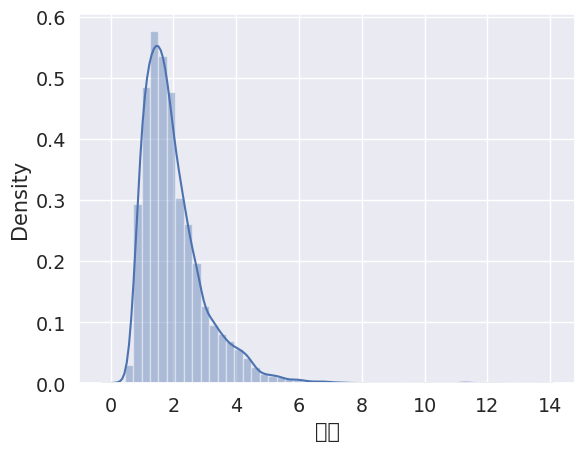

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.distplot(data['單價'])

In [ ]:
# skew() 函数：计算数据的偏度，即数据分布的不对称程度。如果偏度接近 0，表示数据分布大致对称；如果偏度大于 0，表示数据右偏，尾部较长；如果偏度小于 0，表示数据左偏，尾部较长
skewness = data['單價'].skew()
print("Skewness:", skewness)

# kurt() 函数：计算数据的峰度，即数据分布的尖峭程度。正峰度表示分布尖峭（有更多的数据集中在均值附近），负峰度表示分布扁平（数据分散在均值附近）
kurtosis = data['單價'].kurt()
print("Kurtosis:", kurtosis)

Skewness: 2.0150424910665437
Kurtosis: 8.881715652392598


In [ ]:
data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,<0.3公車站數,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,177,2.40,27,2.15,54,9126.87,166.10,4.20,2768378,305266
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,71,6.61,30,3.61,11,9126.87,166.10,3.53,2767990,300677
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,18,5.96,126,7.19,5,924.21,161.78,7.82,2504666,184815
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,52,5.19,72,4.90,9,1946.61,147.86,4.96,2772355,296653
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,167,1.36,73,0.99,109,1946.61,147.86,1.21,2768472,297377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,63,6.39,94,6.23,26,1868.59,101.89,12.11,2758675,280165
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,34,1.38,86,1.77,14,4344.33,87.03,6.96,2743084,247333
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,71,20.86,77,20.51,12,1946.61,147.86,14.76,2773938,316680


In [ ]:
# 取log()進行平滑
data['Log_Values'] = np.log(data['單價'])

# 计算对数变换后的偏度和峰度
log_skewness = df['Log_Values'].skew()
log_kurtosis = df['Log_Values'].kurt()

print("Log-Transformed Skewness:", log_skewness)
print("Log-Transformed Kurtosis:", log_kurtosis)

Log-Transformed Skewness: 0.2565057027078418
Log-Transformed Kurtosis: -0.19233808014165943


In [ ]:
data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與政府最短距,縣市_區域,與百貨最短距,<0.3公車站數,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標,Log_Values
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,2.40,27,2.15,54,9126.87,166.10,4.20,2768378,305266,1.532063
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,6.61,30,3.61,11,9126.87,166.10,3.53,2767990,300677,0.635125
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,5.96,126,7.19,5,924.21,161.78,7.82,2504666,184815,0.398153
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,5.19,72,4.90,9,1946.61,147.86,4.96,2772355,296653,0.718433
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,1.36,73,0.99,109,1946.61,147.86,1.21,2768472,297377,1.184545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,6.39,94,6.23,26,1868.59,101.89,12.11,2758675,280165,-0.101474
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,1.38,86,1.77,14,4344.33,87.03,6.96,2743084,247333,0.043099
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,20.86,77,20.51,12,1946.61,147.86,14.76,2773938,316680,0.763097


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.draw()
/usr

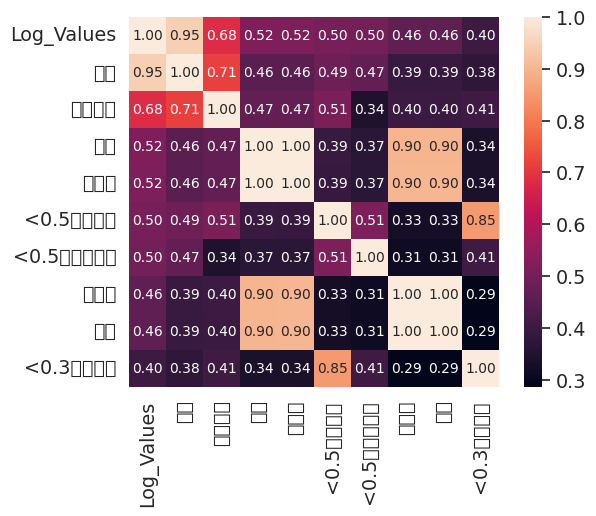

In [ ]:
from dataclasses import dataclass
# 計算列之間相關性
corrmat = data.corr()
# 取 top10
k = 10
cols = corrmat.nlargest(k, 'Log_Values')['Log_Values'].index
# 繪圖
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與政府最短距,縣市_區域,與百貨最短距,<0.3公車站數,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標,Log_Values
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,2.40,27,2.15,54,9126.87,166.10,4.20,2768378,305266,1.532063
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,6.61,30,3.61,11,9126.87,166.10,3.53,2767990,300677,0.635125
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,5.96,126,7.19,5,924.21,161.78,7.82,2504666,184815,0.398153
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,5.19,72,4.90,9,1946.61,147.86,4.96,2772355,296653,0.718433
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,1.36,73,0.99,109,1946.61,147.86,1.21,2768472,297377,1.184545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,6.39,94,6.23,26,1868.59,101.89,12.11,2758675,280165,-0.101474
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,1.38,86,1.77,14,4344.33,87.03,6.96,2743084,247333,0.043099
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,20.86,77,20.51,12,1946.61,147.86,14.76,2773938,316680,0.763097


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

X = data[['Log_Values']]
lof = LocalOutlierFactor(n_neighbors=20)  # 你可以调整邻居的数量和其他参数
outlier_scores = lof.fit_predict(X)
outliers = X[outlier_scores == -1]
cleaned_data = data[data.index.isin(outliers.index) == False]


print("离群点索引：", outliers)
print("剔除离群点后的数据：")
print(cleaned_data)


离群点索引：           Log_Values
ID                  
TR-13       0.933381
TR-24      -0.360418
TR-50       0.713855
TR-58       0.362935
TR-70       0.536052
...              ...
TR-11720    0.407547
TR-11733    0.536052
TR-11734    0.602324
TR-11737    1.086777
TR-11742    0.288543

[961 rows x 1 columns]
剔除离群点后的数据：
          縣市      土地面積  移轉層次  總樓層數  主要用途  主要建材  建物型態         屋齡      建物面積  \
ID                                                                          
TR-1       0 -0.256716    11    11     2     4     0  32.583333 -0.174154   
TR-2       0  0.100134     7    12     2     4     0  24.166667  0.314204   
TR-3       6  0.181921    10    15    11     0     0   6.166667  0.423366   
TR-4       1  0.085594     9    14    11     4     0   8.833333  0.164249   
TR-5       1 -0.938116    41    43     2     5     0  11.000000  0.985839   
...       ..       ...   ...   ...   ...   ...   ...        ...       ...   
TR-11747   5  0.706189     4     5     2     4     1  28.333333 -0.27

In [ ]:
cleaned_data

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與政府最短距,縣市_區域,與百貨最短距,<0.3公車站數,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標,Log_Values
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,2.40,27,2.15,54,9126.87,166.10,4.20,2768378,305266,1.532063
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,6.61,30,3.61,11,9126.87,166.10,3.53,2767990,300677,0.635125
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,5.96,126,7.19,5,924.21,161.78,7.82,2504666,184815,0.398153
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,5.19,72,4.90,9,1946.61,147.86,4.96,2772355,296653,0.718433
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,1.36,73,0.99,109,1946.61,147.86,1.21,2768472,297377,1.184545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,6.39,94,6.23,26,1868.59,101.89,12.11,2758675,280165,-0.101474
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,1.38,86,1.77,14,4344.33,87.03,6.96,2743084,247333,0.043099
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,20.86,77,20.51,12,1946.61,147.86,14.76,2773938,316680,0.763097


In [ ]:
cleaned_data.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '單價', '經度', '緯度', '站點級別',
       '與大眾交通最短距', '與國小最短距', '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數',
       '與大學最短距', '大學總人數', '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距',
       '與醫療機構最短距', '與便利超商最短距', '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域',
       '與百貨最短距', '<0.3公車站數', '人口密度', '老化指數', '與高鐵最短距', '縱坐標', '橫坐標',
       'Log_Values'],
      dtype='object')

In [ ]:
cleaned_data = cleaned_data.drop(['縣市','單價','經度','緯度','<0.3公車站數'], axis = 1)
cleaned_data

,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,...,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標,Log_Values
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,0.0,...,177,2.40,27,2.15,9126.87,166.10,4.20,2768378,305266,1.532063
TR-2,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,0.0,...,71,6.61,30,3.61,9126.87,166.10,3.53,2767990,300677,0.635125
TR-3,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,1.0,...,18,5.96,126,7.19,924.21,161.78,7.82,2504666,184815,0.398153
TR-4,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,1.0,...,52,5.19,72,4.90,1946.61,147.86,4.96,2772355,296653,0.718433
TR-5,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,1.0,...,167,1.36,73,0.99,1946.61,147.86,1.21,2768472,297377,1.184545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,1.0,...,63,6.39,94,6.23,1868.59,101.89,12.11,2758675,280165,-0.101474
TR-11748,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,0.0,...,34,1.38,86,1.77,4344.33,87.03,6.96,2743084,247333,0.043099
TR-11749,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,0.0,...,71,20.86,77,20.51,1946.61,147.86,14.76,2773938,316680,0.763097


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

def remove_comma(x):
  return x.replace(',', '')

feature_continuous = ['土地面積', '建物面積','車位面積', '主建物面積', '陽台面積', '附屬建物面積']
# data['人口密度'] = data['人口密度'].apply(remove_comma).astype(float)
# data['老化指數'] = data['老化指數'].apply(remove_comma).astype(float)

df = cleaned_data
x = df[feature_continuous].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x)
df[feature_continuous] = x_standardized

df


,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,...,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標,Log_Values
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,-0.263817,11,11,2,4,0,32.583333,-0.180321,-0.810899,0.0,...,177,2.40,27,2.15,9126.87,166.10,4.20,2768378,305266,1.532063
TR-2,0.070370,7,12,2,4,0,24.166667,0.284753,-0.810899,0.0,...,71,6.61,30,3.61,9126.87,166.10,3.53,2767990,300677,0.635125
TR-3,0.146963,10,15,11,0,0,6.166667,0.388711,0.147005,1.0,...,18,5.96,126,7.19,924.21,161.78,7.82,2504666,184815,0.398153
TR-4,0.056754,9,14,11,4,0,8.833333,0.141948,0.501504,1.0,...,52,5.19,72,4.90,1946.61,147.86,4.96,2772355,296653,0.718433
TR-5,-0.901942,41,43,2,5,0,11.000000,0.924368,0.509047,1.0,...,167,1.36,73,0.99,1946.61,147.86,1.21,2768472,297377,1.184545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,0.637935,4,5,2,4,1,28.333333,-0.273336,0.462283,1.0,...,63,6.39,94,6.23,1868.59,101.89,12.11,2758675,280165,-0.101474
TR-11748,-0.234873,2,7,2,4,2,29.250000,-0.324768,-0.810899,0.0,...,34,1.38,86,1.77,4344.33,87.03,6.96,2743084,247333,0.043099
TR-11749,-0.907366,15,17,2,4,0,22.833333,-0.822671,-0.810899,0.0,...,71,20.86,77,20.51,1946.61,147.86,14.76,2773938,316680,0.763097


In [ ]:
df.columns

Index(['土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積', '車位面積',
       '車位個數', '主建物面積', '陽台面積', '附屬建物面積', '站點級別', '與大眾交通最短距', '與國小最短距',
       '國小總人數', '與國中最短距', '國中總人數', '與高中最短距', '高中總人數', '與大學最短距', '大學總人數',
       '與atm最短距', '與post最短距', '與bank最短距', '與腳踏車站最短距', '與醫療機構最短距', '與便利超商最短距',
       '<0.5的超商數量', '<0.5公車站數', '與政府最短距', '縣市_區域', '與百貨最短距', '人口密度', '老化指數',
       '與高鐵最短距', '縱坐標', '橫坐標', 'Log_Values'],
      dtype='object')

In [ ]:
x = df.drop(['Log_Values','主要用途','主要建材','站點級別','國小總人數','國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)
#x = df.drop(['主要用途','主要建材','站點級別','國小總人數','國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)

#x = df.drop(['單價','主要用途','主要建材','建物型態','縣市'], axis=1)
#x = df.drop(['Log_Values'], axis=1)
x = np.array(x)
print(x.shape)
print(x)

(10790, 31)
[[-2.63816873e-01  1.10000000e+01  1.10000000e+01 ...  4.20000000e+00
   2.76837800e+06  3.05266000e+05]
 [ 7.03704694e-02  7.00000000e+00  1.20000000e+01 ...  3.53000000e+00
   2.76799000e+06  3.00677000e+05]
 [ 1.46962571e-01  1.00000000e+01  1.50000000e+01 ...  7.82000000e+00
   2.50466600e+06  1.84815000e+05]
 ...
 [-9.07366084e-01  1.50000000e+01  1.70000000e+01 ...  1.47600000e+01
   2.77393800e+06  3.16680000e+05]
 [-1.09766471e+00  1.20000000e+01  1.60000000e+01 ...  3.61000000e+00
   2.76396600e+06  2.95794000e+05]
 [-3.96271918e-01  1.10000000e+01  2.70000000e+01 ...  2.22000000e+00
   2.77219800e+06  3.00173000e+05]]


In [ ]:
y = df['Log_Values']
y.shape

(10790,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100, shuffle=True)
print(' x_num:',x_train.shape, x_test.shape, '\n',
      'y_price:',y_train.shape, y_test.shape)


 x_num: (8632, 31) (2158, 31) 
 y_price: (8632,) (2158,)


In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
name ='XGBRegressor'
model_XGBRegressor = xgb.XGBRegressor(n_estimators = 1000, learning_rate = 0.1)

model_XGBRegressor.fit(x_train, y_train)
pred_result = model_XGBRegressor.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)
print("\n")

XGBRegressor
MAPE: 69.74199453180613
R-squared: 0.9304120849991843


